# <center> ADCIRC Example - Data-Consistent Inversion </center>

___
<font color='blue'><center>**Carlos del-Castillo-Negrete, Rylan Spence**</center></font>
    <br>
    <center>University of Texas at Austin
    <br>
    carlos.delcastillo@utexas.edu, rylan.spence@utexas.edu</center>
___

- [***Parameter Estimation with Maximal Updated Densities***](https://arxiv.org/pdf/2212.04587.pdf) Pilosov, M., del-Castillo-Negrete, C., Yen, T. Y., Butler, T., & Dawson, C. (2022). Parameter Estimation with Maximal Updated Densities. arXiv preprint arXiv:2212.04587.
___


<cite id="e9b62"><a href="#zotero%7C11450669%2F7F6J6S7U">(Wicks &#38; Atkinson, 2017)</a></cite>


____

## Getting dataset

If running from within DesignSafe, data should be under the project directory PRJ-3492 at the path `~/NHERI-Published/PRJ-3492/` in your jupyter instance.

Otherwise [download published dataset](https://doi.org/10.17603/ds2-bmrf-y737) and place in same path as this notebook.

In [1]:
!ls ~/NHERI-Published/PRJ-3492/

ls: /Users/cnegrete/NHERI-Published/PRJ-3492/: No such file or directory


In [2]:
import pickle
from pathlib import Path

path = str(Path.home() / "NHERI-Published/PRJ-3492/si-inlet-full-ds.pickle")
path = str(Path.cwd() / "si-inlet-full-ds.pickle")

In [3]:
with open(path, "rb") as fp:
    full_ds = pickle.load(fp)
full_ds

{'lam': array([[0.05846134, 0.00297906],
        [0.0710498 , 0.0015184 ],
        [0.03923476, 0.00288916],
        ...,
        [0.03734063, 0.0031833 ],
        [0.0982701 , 0.00261676],
        [0.07447272, 0.00207372]]),
 'data': array([[-0.16797325, -0.16520835, -0.16217693, ..., -0.19507711,
         -0.20782025, -0.22119193],
        [ 0.03943376,  0.03950181,  0.039378  , ...,  0.04632727,
          0.03450896,  0.0224353 ],
        [-0.05618183, -0.05429043, -0.0523469 , ..., -0.06055724,
         -0.07302906, -0.08575088],
        ...,
        [-0.04432638, -0.0423741 , -0.04045351, ..., -0.0473353 ,
         -0.05983442, -0.0725768 ],
        [-0.16946854, -0.16905208, -0.16829637, ..., -0.18912562,
         -0.20080129, -0.21305157],
        [-0.07187106, -0.07136021, -0.07078051, ..., -0.07272998,
         -0.08444147, -0.09635552]]),
 'true_vals': array([-0.16000155, -0.15919157, -0.15810846, ..., -0.17847553,
        -0.18957577, -0.20168253]),
 'lam_ref': array([0.0672

### Create Base Data Set

Add full_ds's true to lam sample pool, and its true value.

In [6]:
from pydci.utils import put_df, add_noise
import numpy as np
import pandas as pd

def split_range(mask, n_splits=2):
    n_ts = max(mask) - min(mask)
    splits = range(min(mask), max(mask), int(int(n_ts) / n_splits))
    start = min(mask)
    ranges = []
    for s in splits[1:]:
        ranges.append(range(start, s))
        start = s
    return ranges

def build_dataset(path, lam_true_idx=999, num_samples=999, std_dev=0.05, seed=None):
    with open(path, "rb") as fp:
        full_ds = pickle.load(fp)
    full_ds

    sample_idxs = np.random.choice(999, num_samples, replace=False)

    all_lam = np.vstack([full_ds["lam"], full_ds["lam_ref"].reshape(1, -1)])
    all_data = np.vstack([full_ds["data"], full_ds["true_vals"].reshape(1, -1)])

    measurements = add_noise(all_data[[lam_true_idx]], std_dev, seed=seed).reshape(
        -1, 1
    )

    data_df = pd.DataFrame(full_ds["times"], columns=["ts"])
    data_df["shift_idx"] = 0
    data_df["sample_flag"] = True
    for i, val in enumerate(all_lam[lam_true_idx]):
        data_df[f"lam_true_{i}"] = val
    data_df = put_df(data_df, "q_lam_true", all_data[lam_true_idx].reshape(-1, 1))
    data_df = put_df(data_df, "q_lam_obs", measurements)

    sample_idxs = [x for x in range(len(all_lam)) if x != lam_true_idx]

    lam_df = pd.DataFrame(
        all_lam[sample_idxs],
        columns=[f"lam_{i}" for i in range(len(full_ds["lam"][0]))],
    )
    q_lam_df = pd.DataFrame(
        all_data[sample_idxs],
        columns=[f"q_lam_{i}" for i in range(len(full_ds["data"][0]))],
    )
    samples_df = pd.concat([lam_df, q_lam_df], axis=1)

    data_df, samples_df


# split_range(t3_mask, ns)

### Choose a Lambda Value


In [4]:
# lam_true_idx = np.random.choice(all_lam.shape[0], 1)[0]
# lam_true_idx, all_lam[lam_true_idx]
lam_true_idx = 999  # For same results as pilosov2023parameter when 1000 sample used

### Add Noise to True Signal

In [5]:
from pydci.utils import add_noise

std_dev = 0.05
measurements = add_noise(all_data[[lam_true_idx]], std_dev, seed=123).reshape(-1, 1)

NameError: name 'all_data' is not defined

In [8]:
from pydci.utils import put_df, add_noise
import pandas as pd

data_df = pd.DataFrame(full_ds["times"], columns=["ts"])
data_df["shift_idx"] = 0
data_df["sample_flag"] = True
for i, val in enumerate(all_lam[lam_true_idx]):
    data_df[f"lam_true_{i}"] = val
data_df = put_df(data_df, "q_lam_true", all_data[lam_true_idx].reshape(-1, 1))

data_df = put_df(data_df, "q_lam_obs", measurements)
data_df

NameError: name 'all_lam' is not defined

### Sub-selecting Time Window

In [123]:
t1 = ["2018-01-11 01:00:00", "2018-01-11 07:00:00"]
t2 = ["2018-01-04 11:00:00", "2018-01-04 14:00:00"]
t3 = ["2018-01-07 00:00:00", "2018-01-09 00:00:00"]

In [124]:
t3_mask = data_df.index[(data_df["ts"] > t3[0]) & (data_df["ts"] < t3[1])].values
t3_mask = range(min(t3_mask), max(t3_mask))

In [125]:
import pandas as pd

sample_idxs = [x for x in range(len(all_lam)) if x != lam_true_idx]

lam_df = pd.DataFrame(
    all_lam[sample_idxs], columns=[f"lam_{i}" for i in range(len(full_ds["lam"][0]))]
)
q_lam_df = pd.DataFrame(
    all_data[sample_idxs],
    columns=[f"q_lam_{i}" for i in range(len(full_ds["data"][0]))],
)
samples_df = pd.concat([lam_df, q_lam_df], axis=1)
samples_df

,lam_0,lam_1,q_lam_0,q_lam_1,q_lam_2,q_lam_3,q_lam_4,q_lam_5,q_lam_6,q_lam_7,...,q_lam_6123,q_lam_6124,q_lam_6125,q_lam_6126,q_lam_6127,q_lam_6128,q_lam_6129,q_lam_6130,q_lam_6131,q_lam_6132
0,0.084936,0.002943,-0.233411,-0.232646,-0.231774,-0.230397,-0.228299,-0.225381,-0.222665,-0.220798,...,-0.180585,-0.189803,-0.199755,-0.210158,-0.220826,-0.231739,-0.243026,-0.254795,-0.266926,-0.279366
1,0.080089,0.001477,0.047568,0.047524,0.047361,0.047273,0.047134,0.046509,0.045189,0.043109,...,0.127425,0.118265,0.108668,0.098733,0.088472,0.077767,0.066596,0.055059,0.043301,0.031240
2,0.070161,0.001852,-0.029153,-0.028738,-0.028279,-0.027498,-0.026564,-0.026031,-0.026267,-0.027407,...,0.047542,0.038385,0.028686,0.018663,0.008373,-0.002272,-0.013340,-0.024799,-0.036558,-0.048547
3,0.054278,0.003127,-0.143390,-0.141003,-0.138286,-0.134769,-0.130841,-0.127336,-0.124949,-0.124013,...,-0.087503,-0.097042,-0.107378,-0.118118,-0.129122,-0.140479,-0.152705,-0.165363,-0.178422,-0.191621
4,0.050660,0.002496,-0.123139,-0.121097,-0.118886,-0.115938,-0.112431,-0.109190,-0.106910,-0.105864,...,-0.065519,-0.074975,-0.085247,-0.095900,-0.106755,-0.117859,-0.129364,-0.141331,-0.153467,-0.165951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.057768,0.001968,-0.051520,-0.050943,-0.050305,-0.049309,-0.048123,-0.047322,-0.047333,-0.048314,...,0.023133,0.013897,0.004059,-0.006110,-0.016511,-0.027208,-0.038264,-0.049645,-0.061275,-0.073119
96,0.098705,0.002237,-0.102185,-0.101826,-0.101259,-0.100009,-0.098234,-0.096675,-0.095994,-0.096449,...,-0.035802,-0.044802,-0.054459,-0.064506,-0.074874,-0.085643,-0.096874,-0.108469,-0.120239,-0.132286
97,0.085444,0.002458,-0.140996,-0.140490,-0.139633,-0.138127,-0.136170,-0.134351,-0.133313,-0.133437,...,-0.084500,-0.093406,-0.102973,-0.112901,-0.123063,-0.133487,-0.144675,-0.156219,-0.168039,-0.179664
98,0.065267,0.003045,-0.212427,-0.209993,-0.207002,-0.202497,-0.196608,-0.190324,-0.185136,-0.181867,...,-0.161089,-0.171040,-0.181869,-0.193015,-0.203964,-0.215053,-0.227350,-0.240300,-0.253529,-0.266919


In [126]:
# Verify true isn't in set
np.any(samples_df["lam_0"] == data_df["lam_true_0"].values[0])

False

In [127]:
full_ds["lam"].shape, full_ds["data"].shape, full_ds["true_vals"].shape

((999, 2), (999, 6133), (6133,))

In [128]:
data_df.index.values

array([   0,    1,    2, ..., 6130, 6131, 6132])

## State Plots

In [129]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pdb


def plot_state(data, samples=None, mask=None):
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))

    mask = data.index.values if mask is None else mask
    sns.lineplot(data.iloc[mask], x="ts", y="q_lam_true_0", label="True State", ax=ax)
    sns.scatterplot(
        data.iloc[mask],
        x="ts",
        y="q_lam_obs_0",
        marker="*",
        label="Observed State",
        ax=ax,
    )

    if samples is not None:
        cols = [
            c
            for c in samples.columns
            if c.startswith("q_lam_") and int(c.split("_")[-1]) in mask
        ]
        for i in np.random.choice(range(len(samples)), 10, replace=False):
            to_plot = pd.DataFrame(
                samples.iloc[[i]][cols].values.T, columns=[f"q_lam_s={i}"]
            )
            to_plot["ts"] = data.iloc[mask]["ts"].values
            sns.lineplot(to_plot, x="ts", y=f"q_lam_s={i}", ax=ax, color="r", alpha=0.1)

    ax.set_title(
        f'lam_true = {data["lam_true_0"].values[0]}, {data["lam_true_1"].values[0]}'
    )

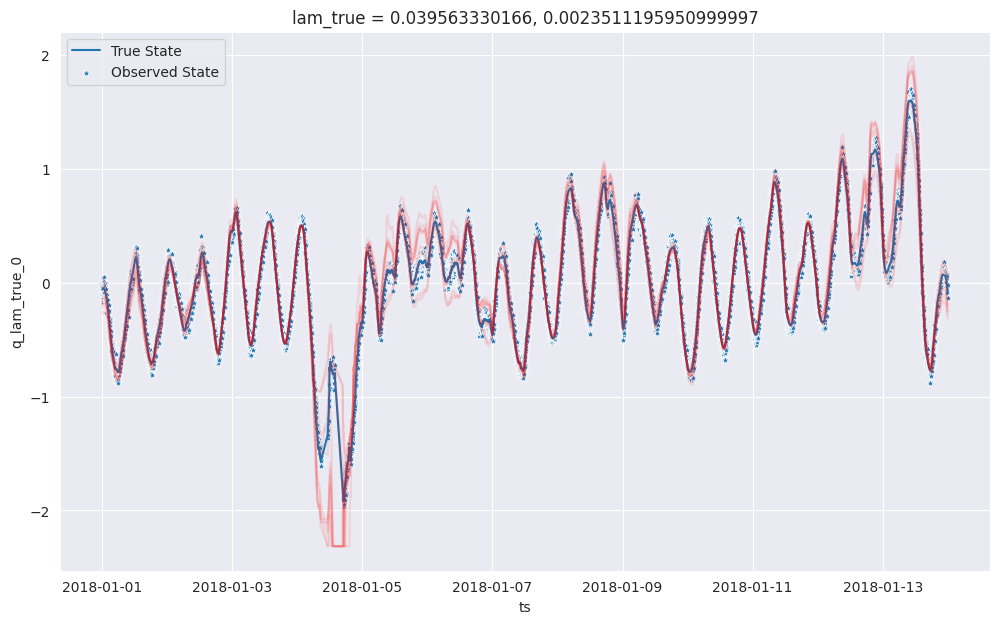

In [130]:
plot_state(data_df, samples=samples_df)

## Full DataSet

### Solving Using $Q_{PCA}$ Map

In [131]:
from pydci.utils import add_noise
from pydci import PCAMUDProblem

pca = PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve(pca_components=[0])
pca.result

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask
0,0.121801,3.763086,0.080643,0.002093,[0],None


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

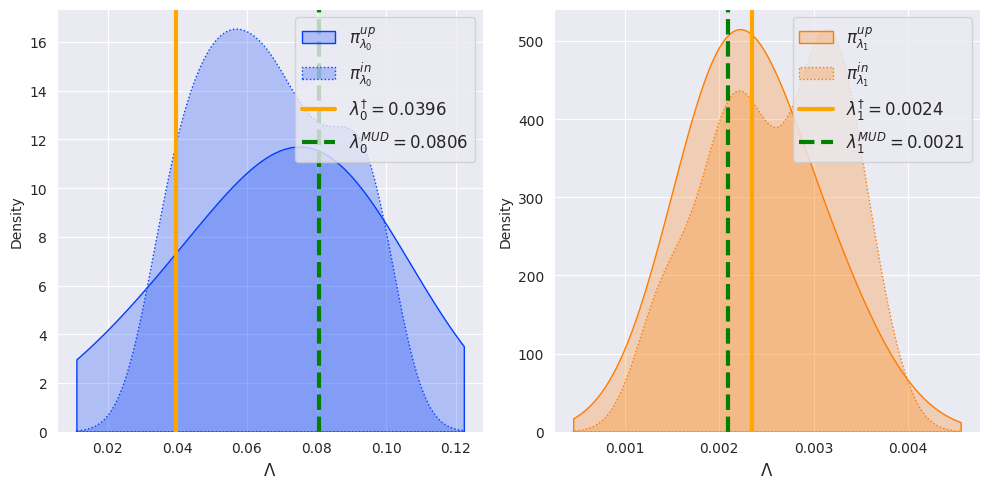

In [132]:
import matplotlib.pyplot as plt


def plot_params(prob, state_df, true_idx):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    prob.plot_L(df=state_df, param_idx=0, lam_true=[all_lam[true_idx]], ax=ax[0])
    prob.plot_L(df=state_df, param_idx=1, lam_true=[all_lam[true_idx]], ax=ax[1])

    return ax


plot_params(pca, pca.state, lam_true_idx)

### Iterative Solve over Components

In [133]:
from pydci.utils import add_noise
from pydci import PCAMUDProblem

pca = PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve_it(pca_components=[[0], [1]])
pca.it_results

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i
0,0.121801,3.763086,0.080643,0.002093,[0],None,0


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

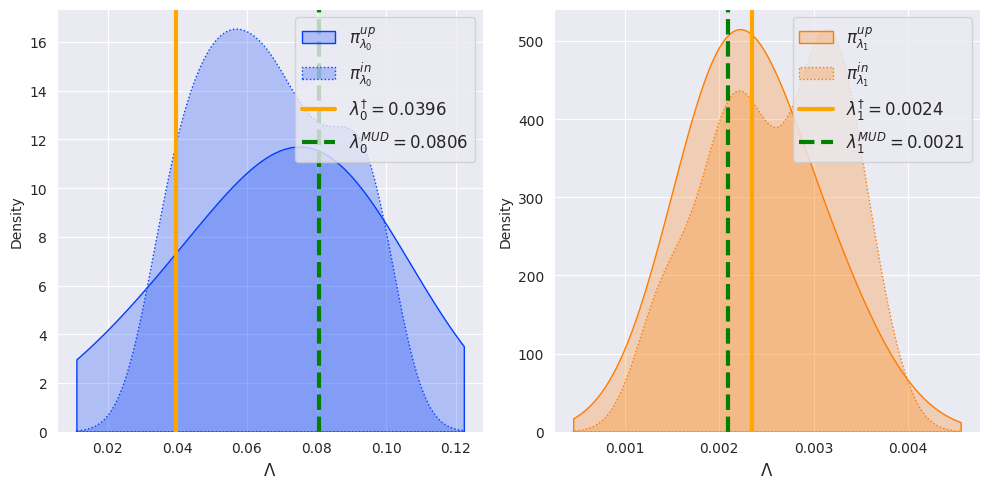

In [134]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 0], lam_true_idx)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

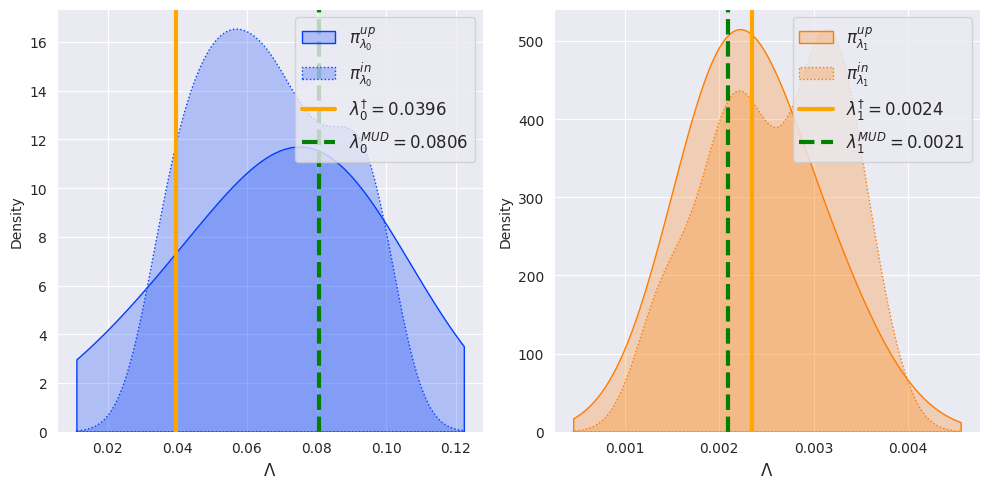

In [135]:
plot_params(pca, pca.state, lam_true_idx)

### Iterative Solve over Data Chunks

In [66]:
def split_range(mask, n_splits=2):
    n_ts = max(mask) - min(mask)
    splits = range(min(mask), max(mask), int(int(n_ts) / n_splits))
    start = min(mask)
    ranges = []
    for s in splits[1:]:
        ranges.append(range(start, s))
        start = s
    return ranges


split_range(range(len(measurements)), 3)

[range(0, 2044), range(2044, 4088)]

In [43]:
max(range(10))

9

In [80]:
pca.pca_states

,lam_0,lam_1,q_pca_0,q_pca_1,weight,pi_in,pi_obs,pi_pr,ratio,pi_up,iteration,pca_components,pca_mask
0,0.071064,0.001308,4.103931,0.934697,1.000000e+00,4203.892022,8.783399e-05,5.252408e-02,1.672261e-03,7.030006e+00,0,[0],"range(2774, 2821)"
1,0.048059,0.002301,-2.293293,0.014153,1.000000e+00,6713.032173,2.876677e-02,9.278096e-02,3.100504e-01,2.081378e+03,0,[0],"range(2774, 2821)"
2,0.050825,0.001849,1.246205,0.388244,1.000000e+00,6523.371533,1.835161e-01,8.928420e-02,2.055416e+00,1.340824e+04,0,[0],"range(2774, 2821)"
3,0.059981,0.001814,1.217171,0.404492,1.000000e+00,6321.170140,1.901978e-01,8.908572e-02,2.134997e+00,1.349568e+04,0,[0],"range(2774, 2821)"
4,0.065267,0.003045,-4.170087,1.022464,1.000000e+00,3756.974994,6.680362e-05,1.220627e-01,5.472893e-04,2.056152e+00,0,[0],"range(2774, 2821)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.072864,0.002043,-3.996884,0.741665,7.024920e-12,1960.057531,1.355080e-04,6.374936e-03,2.125637e-02,2.926843e-10,19,[0],"range(3667, 3714)"
96,0.076545,0.002347,7.829790,0.119423,2.371538e-63,1259.413180,1.943408e-14,7.196562e-02,2.700467e-13,8.065609e-73,19,[0],"range(3667, 3714)"
97,0.038228,0.001895,-9.696584,1.052576,1.150914e-54,6969.603159,1.527268e-21,3.721370e-06,4.104048e-16,3.292026e-66,19,[0],"range(3667, 3714)"
98,0.087306,0.001928,-8.476235,1.007657,1.463348e-36,762.448930,9.991438e-17,4.118732e-05,2.425853e-12,2.706593e-45,19,[0],"range(3667, 3714)"


In [37]:
pca = PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve_it(
    pca_splits=split_range(range(len(measurements)), 300)[0:50], pca_components=[[0]]
)
pca.it_results

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i
0,0.969999,1.338181,0.074371,0.001882,[0],"range(0, 20)",0
0,0.673057,1.277361,0.071216,0.001943,[0],"range(20, 40)",1
0,0.306067,4.954423,0.070161,0.001852,[0],"range(40, 60)",2
0,0.482254,1.701902,0.077844,0.001903,[0],"range(60, 80)",3
0,0.831005,0.504456,0.077844,0.001903,[0],"range(80, 100)",4
0,0.552081,0.716274,0.077844,0.001903,[0],"range(100, 120)",5
0,1.103401,0.500445,0.074371,0.001882,[0],"range(120, 140)",6
0,0.956309,0.146862,0.077844,0.001903,[0],"range(140, 160)",7
0,1.007456,0.079566,0.077844,0.001903,[0],"range(160, 180)",8
0,0.850097,0.345202,0.071216,0.001943,[0],"range(180, 200)",9


<Axes: xlabel='i', ylabel='e_r'>

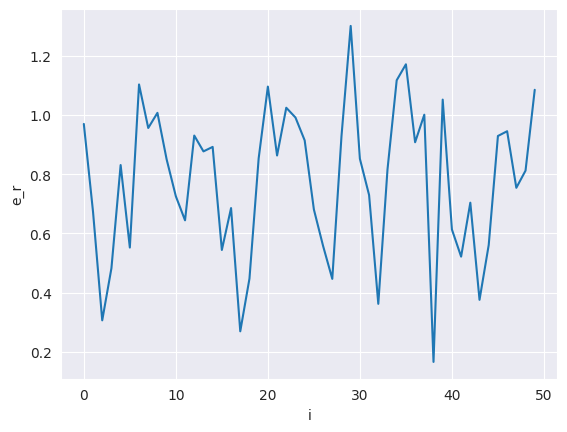

In [38]:
import seaborn as sns

sns.lineplot(pca.it_results, x="i", y="e_r")

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

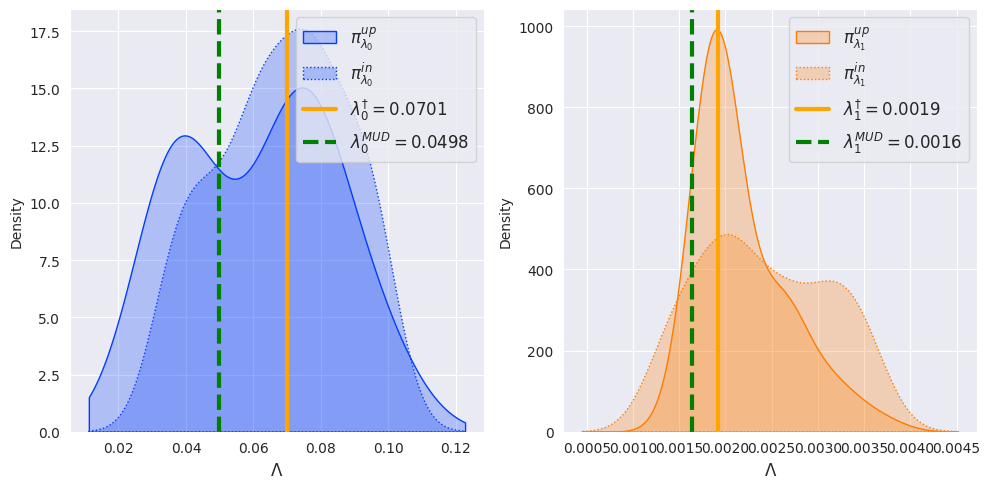

In [40]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 0], lam_true_idx)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

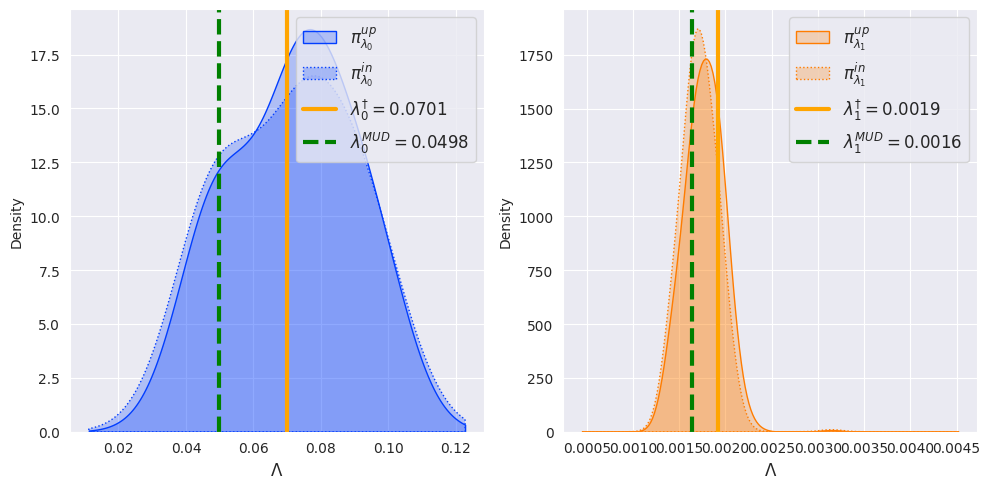

In [42]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 48], lam_true_idx)

### Sequential Solve Method

In [92]:
from pydci.utils import add_noise
from pydci import PCAMUDProblem
from pydci.log import enable_log
import pydci.consistent_bayes.PCAMUDProblem as PCA
import importlib

importlib.reload(PCA)

enable_log()

pca = PCA.PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve_seq(chunk_size=10, pca_components=[0])
pca.result

[05/01/23 18:17:26] INFO     Logger initialized                                                           ]8;id=498521;file:///home/jovyan/work/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=263228;file:///home/jovyan/work/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Solving for : range(0, 10), [0]                                   ]8;id=281647;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=320583;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=895992;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=77588;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00967996e+01 3.77258845e-03]                     ]8;id=698902;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=819865;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=324499;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=515842;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=257542;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=541609;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r) within thresh, adding 10 more data.                          ]8;id=778878;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=9087;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#420\420]8;;\

                    INFO     E(r)=0.9533304701394044 outside of threshold. Reseting to chunk   ]8;id=426695;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=681966;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(0, 10), updating weights.                                                       

                    INFO     Computing PCA using 2 components                                  ]8;id=657097;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=189205;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00967996e+01 3.77258845e-03]                     ]8;id=134207;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=956273;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=764651;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=913999;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving for : range(10, 20), [0]                                  ]8;id=428917;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=134281;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=568093;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=676793;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990627e+01 1.76240623e-03]                     ]8;id=365136;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=184614;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=53002;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=983597;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=527469;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=906267;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6157928980729978 outside of threshold. Reseting to chunk   ]8;id=854197;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=148787;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(0, 10), updating weights.                                                       

                    INFO     Computing PCA using 2 components                                  ]8;id=358392;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=910306;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00967996e+01 3.77258845e-03]                     ]8;id=286611;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=901344;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=474205;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=574674;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(10, 20)                                      ]8;id=446515;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=702021;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(20, 30), [0]                                  ]8;id=804086;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=711693;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=412160;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=452421;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=345937;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=898059;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=392482;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=858702;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r) within thresh, adding 10 more data.                          ]8;id=694229;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=910233;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#420\420]8;;\

                    INFO     E(r)=0.9872963284788101 outside of threshold. Reseting to chunk   ]8;id=189085;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=32911;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=106287;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=682581;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=892745;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=650361;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=530283;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=452438;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving for : range(30, 40), [0]                                  ]8;id=123883;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=48712;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=509859;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=632381;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00974648e+01 2.81286630e-03]                     ]8;id=111056;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=564577;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=475536;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=743336;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=231008;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=73226;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[05/01/23 18:17:27] INFO     E(r)=0.8004841392773052 outside of threshold. Reseting to chunk   ]8;id=733832;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=27775;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=124933;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=589130;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=154291;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=613521;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=332294;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=770944;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(30, 40)                                      ]8;id=143771;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=245916;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(40, 50), [0]                                  ]8;id=926039;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=89268;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=260079;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=915686;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.08413083  0.0126339 ]                           ]8;id=781757;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=528936;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=501776;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=79991;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.5706599132348773 outside of threshold. Reseting to chunk   ]8;id=96410;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=100854;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=86003;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=189297;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=643912;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=862175;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=947961;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=167740;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(40, 50)                                      ]8;id=718826;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=524788;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(50, 60), [0]                                  ]8;id=534242;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=913262;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=531839;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=525053;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.03537081  0.05214572]                           ]8;id=136992;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=444616;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=993331;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=566656;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.4718374800186467 outside of threshold. Reseting to chunk   ]8;id=682915;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=935878;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=458570;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=106958;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=890838;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=922857;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=438921;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=320587;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(50, 60)                                      ]8;id=263301;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=149786;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(60, 70), [0]                                  ]8;id=241882;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=521030;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=696890;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=491712;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.01178953  0.06701583]                           ]8;id=394015;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=631393;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=662947;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=955733;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8841125617835913 outside of threshold. Reseting to chunk   ]8;id=964276;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=198499;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=234432;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=760437;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=871569;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=423601;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=799884;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=813786;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(60, 70)                                      ]8;id=94812;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=768035;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(70, 80), [0]                                  ]8;id=62647;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=143560;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=849729;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=147567;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.97737451 0.08805888]                             ]8;id=128246;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=849109;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=907261;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=675454;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6536028666229423 outside of threshold. Reseting to chunk   ]8;id=915566;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=201989;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=218445;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=960231;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=121591;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=315363;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=614923;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=786170;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(70, 80)                                      ]8;id=234549;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=650257;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(80, 90), [0]                                  ]8;id=742858;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=139975;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=531338;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=616882;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.86957823 0.17270528]                             ]8;id=883034;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=585049;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=948933;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=479130;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6881367062847104 outside of threshold. Reseting to chunk   ]8;id=135183;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=939825;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=556889;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=859473;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=990917;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=351043;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=689682;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=860741;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(80, 90)                                      ]8;id=589679;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=983497;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(90, 100), [0]                                 ]8;id=168863;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=52684;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=710902;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=371906;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.84223051 0.21687438]                             ]8;id=997358;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=753817;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=839484;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=912485;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.5485661350534601 outside of threshold. Reseting to chunk   ]8;id=299145;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=267389;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(20, 30), updating weights.                                                      

                    INFO     Computing PCA using 2 components                                  ]8;id=294375;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=143791;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00998269e+01 8.23642011e-04]                     ]8;id=309848;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=77941;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=918339;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=773104;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(90, 100)                                     ]8;id=699856;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=394499;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(100, 110), [0]                                ]8;id=417992;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=481257;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=689398;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=230239;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=718885;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=764358;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=1200;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=469900;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r) within thresh, adding 10 more data.                          ]8;id=733877;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=720943;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#420\420]8;;\

                    INFO     E(r)=0.9922259475139602 outside of threshold. Reseting to chunk   ]8;id=139328;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=375268;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(100, 110), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=106419;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=44817;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=251585;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=80034;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=423674;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=600544;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving for : range(110, 120), [0]                                ]8;id=134514;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=205241;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=803277;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=105135;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.9220528  0.09893113]                             ]8;id=301399;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=305579;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=337668;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=685106;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=350917;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=124143;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.863033737971095 outside of threshold. Reseting to chunk    ]8;id=851738;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=657103;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(100, 110), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=711577;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=183069;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=692096;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=186136;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=854079;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=316680;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(110, 120)                                    ]8;id=237606;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=700637;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(120, 130), [0]                                ]8;id=320795;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=479746;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=239127;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=573836;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.9863895 0.080247 ]                               ]8;id=583614;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=136932;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=815904;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=438361;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.3729533172659129 outside of threshold. Reseting to chunk   ]8;id=720751;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=85546;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(100, 110), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=581196;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=394084;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=268516;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=518852;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=32923;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=766369;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(120, 130)                                    ]8;id=773937;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=178199;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(130, 140), [0]                                ]8;id=875430;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=467407;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=628855;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=980389;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.04114488  0.04339713]                           ]8;id=688785;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=978296;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=148115;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=467597;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8913958742598477 outside of threshold. Reseting to chunk   ]8;id=683293;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=470985;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(100, 110), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=445290;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=221887;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=259853;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=565745;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=486962;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=825498;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(130, 140)                                    ]8;id=778855;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=827426;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(140, 150), [0]                                ]8;id=852291;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=540288;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=867564;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=15254;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.04100312  0.04545047]                           ]8;id=413620;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=771323;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=646754;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=473291;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6748141659146858 outside of threshold. Reseting to chunk   ]8;id=517435;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=309677;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(100, 110), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=192802;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=218259;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=288260;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=759439;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=363683;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=963593;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(140, 150)                                    ]8;id=724102;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=173932;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(150, 160), [0]                                ]8;id=425109;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=748593;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=612520;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=330416;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.05012686  0.03920381]                           ]8;id=426862;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=105283;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=448933;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=213530;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8710735129534194 outside of threshold. Reseting to chunk   ]8;id=375744;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=284226;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(100, 110), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=488605;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=963216;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=616147;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=547503;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=262728;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=675138;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(150, 160)                                    ]8;id=393085;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=571601;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(160, 170), [0]                                ]8;id=176703;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=620442;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=401236;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=64425;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.07769763  0.01789067]                           ]8;id=395569;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=63386;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=337134;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=659;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8937580514912175 outside of threshold. Reseting to chunk   ]8;id=538242;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=444666;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(100, 110), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=33818;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=550954;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.99569895 0.0749756 ]                             ]8;id=544818;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=5558;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=260027;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=65037;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(160, 170)                                    ]8;id=607739;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=442830;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(170, 180), [0]                                ]8;id=361393;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=397943;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=288627;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=316137;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.0091369e+01 7.3466106e-03]                       ]8;id=814849;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=790779;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=122027;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=797800;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r) within thresh, adding 10 more data.                          ]8;id=168903;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=538558;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#420\420]8;;\

                    INFO     E(r)=0.9233166215325908 outside of threshold. Reseting to chunk   ]8;id=257538;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=825095;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(170, 180), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=797039;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=233470;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.0091369e+01 7.3466106e-03]                       ]8;id=721567;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=95197;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=734025;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=316226;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving for : range(180, 190), [0]                                ]8;id=929624;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=848263;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=35063;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=467656;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00923495e+01 6.65416876e-03]                     ]8;id=498204;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=93833;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=75104;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=612289;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=713287;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=122016;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r) within thresh, adding 10 more data.                          ]8;id=302368;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=783100;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#420\420]8;;\

                    INFO     E(r)=1.0406579286901787 outside of threshold. Reseting to chunk   ]8;id=563467;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=959158;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(180, 190), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=961957;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=403034;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00923495e+01 6.65416876e-03]                     ]8;id=331693;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=804198;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=718373;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=550527;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving for : range(190, 200), [0]                                ]8;id=585353;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=136026;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=126955;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=263295;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00938893e+01 5.45697175e-03]                     ]8;id=758697;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=504376;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=907714;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=413955;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=834092;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=821406;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r) within thresh, adding 10 more data.                          ]8;id=99677;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=182904;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#420\420]8;;\

                    INFO     E(r)=1.0258462689141463 outside of threshold. Reseting to chunk   ]8;id=870085;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=543237;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(190, 200), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=863013;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=173666;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00938893e+01 5.45697175e-03]                     ]8;id=762595;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=765511;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=720805;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=817418;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving for : range(200, 210), [0]                                ]8;id=984472;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=267797;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=553595;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=43844;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00951372e+01 4.47226961e-03]                     ]8;id=513911;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=436894;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=69948;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=881352;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=274883;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=133575;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.7509564490640818 outside of threshold. Reseting to chunk   ]8;id=341578;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=59153;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(190, 200), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=280571;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=767257;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00938893e+01 5.45697175e-03]                     ]8;id=31055;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=249047;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

[05/01/23 18:17:28] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=102078;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=880600;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(200, 210)                                    ]8;id=381790;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=968048;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(210, 220), [0]                                ]8;id=147496;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=504956;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=640104;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=593466;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00972632e+01 2.97373439e-03]                     ]8;id=345270;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=565036;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=92628;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=754920;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8369024061433727 outside of threshold. Reseting to chunk   ]8;id=126191;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=536677;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(190, 200), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=344362;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=988525;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00938893e+01 5.45697175e-03]                     ]8;id=150840;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=677751;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=162912;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=1706;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(210, 220)                                    ]8;id=857067;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=939689;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(220, 230), [0]                                ]8;id=922486;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=728270;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=430378;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=287869;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=888500;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=580923;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=422360;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=445121;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r) within thresh, adding 10 more data.                          ]8;id=798609;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=965883;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#420\420]8;;\

                    INFO     E(r)=0.9694399478227469 outside of threshold. Reseting to chunk   ]8;id=545009;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=203341;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=694492;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=586451;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=21924;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=269036;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=471589;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=352338;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving for : range(230, 240), [0]                                ]8;id=198144;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=141074;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=683648;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=267753;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00976386e+01 2.87701617e-03]                     ]8;id=405645;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=497044;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=653043;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=524761;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=864669;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=994177;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.7279230450945362 outside of threshold. Reseting to chunk   ]8;id=140634;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=537565;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=411238;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=818992;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=653978;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=18845;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=655553;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=442056;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(230, 240)                                    ]8;id=585402;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=983129;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(240, 250), [0]                                ]8;id=829293;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=187358;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=873345;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=483582;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00951485e+01 5.29207883e-03]                     ]8;id=143599;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=424667;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=861439;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=481591;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8995207314572258 outside of threshold. Reseting to chunk   ]8;id=12203;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=349099;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=806905;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=827670;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=64782;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=319857;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=967016;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=66306;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(240, 250)                                    ]8;id=367296;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=55629;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(250, 260), [0]                                ]8;id=596031;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=779919;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=553422;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=673691;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00993466e+01 1.21304000e-03]                     ]8;id=475268;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=658901;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=794596;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=771499;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.49810465393161746 outside of threshold. Reseting to chunk  ]8;id=122480;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=901445;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=200570;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=756298;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=258611;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=338160;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=149840;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=785404;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(250, 260)                                    ]8;id=417620;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=688811;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(260, 270), [0]                                ]8;id=174373;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=880069;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=329537;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=596255;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00967289e+01 3.98803777e-03]                     ]8;id=332745;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=892829;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=451275;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=587245;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6388944212401526 outside of threshold. Reseting to chunk   ]8;id=723915;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=438952;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=911805;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=998093;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=853966;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=710202;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=10170;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=500733;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(260, 270)                                    ]8;id=673328;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=250685;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(270, 280), [0]                                ]8;id=878876;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=500871;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=252503;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=983929;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00989158e+01 1.70449037e-03]                     ]8;id=358275;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=261492;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=549893;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=898402;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.7861460490081237 outside of threshold. Reseting to chunk   ]8;id=615115;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=576281;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=242051;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=473794;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=276692;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=675095;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=469554;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=112635;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(270, 280)                                    ]8;id=236759;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=648294;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(280, 290), [0]                                ]8;id=957060;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=329982;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=271479;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=367129;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00988323e+01 1.69023302e-03]                     ]8;id=653061;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=854986;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=442991;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=973327;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6416892275278328 outside of threshold. Reseting to chunk   ]8;id=67383;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=439002;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=731571;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=290769;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=381614;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=419226;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=906630;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=485012;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(280, 290)                                    ]8;id=198119;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=695277;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(290, 300), [0]                                ]8;id=514923;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=683465;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=896466;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=307279;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00982703e+01 1.81126655e-03]                     ]8;id=862322;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=389436;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=852372;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=168373;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.7054844923318381 outside of threshold. Reseting to chunk   ]8;id=139807;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=613272;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=278686;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=227844;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=190213;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=154738;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=42179;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=164412;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(290, 300)                                    ]8;id=153644;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=483473;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(300, 310), [0]                                ]8;id=138371;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=878785;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=191799;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=409109;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00879899e+01 1.00873089e-02]                     ]8;id=538124;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=522322;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=527587;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=998704;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6984488684977344 outside of threshold. Reseting to chunk   ]8;id=425391;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=555121;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=595366;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=469187;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=306986;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=551494;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=545751;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=465253;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(300, 310)                                    ]8;id=266321;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=619716;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(310, 320), [0]                                ]8;id=66375;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=898966;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=963301;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=894389;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.0801681   0.01406439]                           ]8;id=96577;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=453089;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=821665;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=940830;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.5554893292322899 outside of threshold. Reseting to chunk   ]8;id=951100;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=420489;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=917967;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=555159;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=455624;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=875095;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=660808;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=286531;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(310, 320)                                    ]8;id=305450;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=133579;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(320, 330), [0]                                ]8;id=181977;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=542170;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=162781;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=599046;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.05541846  0.03586221]                           ]8;id=503015;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=429083;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=900369;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=781147;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.5980817308864259 outside of threshold. Reseting to chunk   ]8;id=984587;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=364311;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=100997;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=921402;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=173732;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=860222;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=85642;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=506468;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(320, 330)                                    ]8;id=320727;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=719765;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(330, 340), [0]                                ]8;id=274070;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=468300;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=768138;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=713963;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.02854575  0.06059149]                           ]8;id=30752;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=459561;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=914328;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=610598;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6631474060340216 outside of threshold. Reseting to chunk   ]8;id=509456;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=960265;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=596491;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=107198;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=493040;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=542559;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=319860;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=930220;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(330, 340)                                    ]8;id=676604;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=590760;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(340, 350), [0]                                ]8;id=255773;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=955479;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=242226;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=8671;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.0059299  0.0705419]                             ]8;id=152502;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=853502;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=836238;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=460031;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.46142101465814617 outside of threshold. Reseting to chunk  ]8;id=882024;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=628397;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=677052;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=410926;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=241783;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=448200;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=180880;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=245283;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(340, 350)                                    ]8;id=304349;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=184435;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(350, 360), [0]                                ]8;id=334516;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=317587;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=187162;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=500282;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.94928305 0.08981007]                             ]8;id=966083;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=100454;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=587246;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=246085;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.20268654266532685 outside of threshold. Reseting to chunk  ]8;id=190137;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=603101;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=67103;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=694083;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=673855;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=204011;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=991830;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=65036;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(350, 360)                                    ]8;id=555852;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=20899;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(360, 370), [0]                                ]8;id=492344;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=490601;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=919286;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=366079;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.93098296 0.10168925]                             ]8;id=530187;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=19607;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=947068;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=642439;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.37912630083265825 outside of threshold. Reseting to chunk  ]8;id=241701;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=100611;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=226464;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=171735;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=266506;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=958911;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=941008;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=942416;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(360, 370)                                    ]8;id=118159;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=183379;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(370, 380), [0]                                ]8;id=89980;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=921616;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=291351;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=777171;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.96621126 0.11181461]                             ]8;id=994110;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=438044;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=292757;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=10785;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.31637565931448536 outside of threshold. Reseting to chunk  ]8;id=821239;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=929598;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=990100;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=491845;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=207528;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=392764;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=138407;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=500565;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(370, 380)                                    ]8;id=222274;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=96653;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(380, 390), [0]                                ]8;id=448572;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=407593;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=117399;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=238828;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.0673969   0.02585241]                           ]8;id=77021;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=931520;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=232874;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=992695;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[05/01/23 18:17:29] INFO     E(r)=0.5281996893187078 outside of threshold. Reseting to chunk   ]8;id=278414;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=327662;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=137544;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=344503;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=365696;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=879016;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=897534;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=822805;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(380, 390)                                    ]8;id=884952;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=222981;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(390, 400), [0]                                ]8;id=61272;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=912693;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=127711;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=627293;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.04807132  0.02579399]                           ]8;id=85256;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=231466;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=278569;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=854679;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6712351741631641 outside of threshold. Reseting to chunk   ]8;id=585463;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=397655;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=497613;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=945088;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=206729;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=945320;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=720820;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=917142;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(390, 400)                                    ]8;id=707430;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=985744;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(400, 410), [0]                                ]8;id=596714;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=837928;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=519229;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=965540;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.04147939  0.04260934]                           ]8;id=559435;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=646175;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=675113;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=266917;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6706809681059405 outside of threshold. Reseting to chunk   ]8;id=801431;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=244620;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=362685;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=32350;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=653359;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=260473;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=724217;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=280211;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(400, 410)                                    ]8;id=925351;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=405559;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(410, 420), [0]                                ]8;id=900873;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=967207;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=244684;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=446638;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.0577402   0.03222636]                           ]8;id=521717;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=120517;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=97982;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=417692;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.7833280534101845 outside of threshold. Reseting to chunk   ]8;id=8616;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=126686;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=792801;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=610304;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=852132;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=325680;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=408155;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=267611;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(410, 420)                                    ]8;id=701271;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=135307;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(420, 430), [0]                                ]8;id=62180;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=29561;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=684934;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=953311;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.08350563  0.01310968]                           ]8;id=266126;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=415801;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=427688;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=373430;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8470061089675048 outside of threshold. Reseting to chunk   ]8;id=512326;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=218995;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=799488;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=969773;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=946409;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=63260;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=216565;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=206483;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(420, 430)                                    ]8;id=742204;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=188066;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(430, 440), [0]                                ]8;id=450069;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=590821;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=822662;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=143520;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00924139e+01 5.15111279e-03]                     ]8;id=198011;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=856083;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=446525;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=107003;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.4806767074833547 outside of threshold. Reseting to chunk   ]8;id=153941;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=80128;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=961224;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=713088;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=624148;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=66477;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=327800;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=294232;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(430, 440)                                    ]8;id=338212;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=843957;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(440, 450), [0]                                ]8;id=189128;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=2454;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=227064;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=283853;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00936190e+01 5.25111375e-03]                     ]8;id=82029;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=299772;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=993288;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=330662;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.5478819182444501 outside of threshold. Reseting to chunk   ]8;id=927823;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=635534;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=326529;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=200461;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=822674;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=123462;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=611222;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=548409;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(440, 450)                                    ]8;id=350478;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=193331;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(450, 460), [0]                                ]8;id=9366;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=877041;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=681942;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=301344;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00962068e+01 3.30935304e-03]                     ]8;id=64297;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=994728;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=709202;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=262434;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8553527641645959 outside of threshold. Reseting to chunk   ]8;id=422569;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=651146;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=529233;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=676602;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=833372;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=256982;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=444440;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=35774;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(450, 460)                                    ]8;id=274218;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=558724;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(460, 470), [0]                                ]8;id=426164;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=619598;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=578637;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=990670;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00963232e+01 3.20582780e-03]                     ]8;id=47973;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=854557;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=53998;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=204763;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6076579999003697 outside of threshold. Reseting to chunk   ]8;id=509962;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=660431;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=561296;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=43804;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=806805;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=95139;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=185456;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=415631;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(460, 470)                                    ]8;id=234002;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=230016;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(470, 480), [0]                                ]8;id=837259;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=657897;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=845870;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=948818;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00976774e+01 2.46256467e-03]                     ]8;id=733242;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=796754;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=551587;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=491355;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.846254169891166 outside of threshold. Reseting to chunk    ]8;id=427409;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=58800;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=739831;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=523803;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=488240;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=196313;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=457228;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=204658;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(470, 480)                                    ]8;id=554951;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=947148;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(480, 490), [0]                                ]8;id=97710;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=269330;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=300087;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=922718;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00975044e+01 2.79032900e-03]                     ]8;id=82163;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=735231;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=343590;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=182924;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.5120971035457351 outside of threshold. Reseting to chunk   ]8;id=706935;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=385631;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=254230;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=73202;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=510118;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=757315;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=339775;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=24014;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(480, 490)                                    ]8;id=557253;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=562703;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(490, 500), [0]                                ]8;id=143503;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=396034;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=533768;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=823248;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990905e+01 1.17063517e-03]                     ]8;id=334040;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=848518;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=420989;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=857800;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.7054234704417299 outside of threshold. Reseting to chunk   ]8;id=636283;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=162205;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=802452;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=715645;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=16287;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=771228;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=63006;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=891343;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(490, 500)                                    ]8;id=912351;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=493070;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(500, 510), [0]                                ]8;id=381238;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=756210;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=830915;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=192533;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00985618e+01 1.79887387e-03]                     ]8;id=557020;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=384054;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=318121;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=32311;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6148198163697428 outside of threshold. Reseting to chunk   ]8;id=463040;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=514580;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=630727;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=394081;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=719563;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=247394;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=607732;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=473417;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(500, 510)                                    ]8;id=193943;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=568398;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(510, 520), [0]                                ]8;id=130974;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=150471;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=170481;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=656965;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00936480e+01 6.43363618e-03]                     ]8;id=968252;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=232018;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=270973;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=780888;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.3704691410383522 outside of threshold. Reseting to chunk   ]8;id=789720;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=449451;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=542880;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=759834;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=176060;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=633727;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=17683;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=44754;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(510, 520)                                    ]8;id=429701;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=478415;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(520, 530), [0]                                ]8;id=770169;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=348305;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=825456;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=382365;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.08109976  0.01255605]                           ]8;id=204844;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=530479;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=502038;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=530085;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.3341531211416229 outside of threshold. Reseting to chunk   ]8;id=562148;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=807705;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=607942;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=212455;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=768923;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=448199;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=292429;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=876689;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(520, 530)                                    ]8;id=481135;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=353907;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(530, 540), [0]                                ]8;id=210354;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=634468;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=460201;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=530219;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [9.9075065  0.14327833]                             ]8;id=992774;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=560947;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=230343;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=923810;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.06653221915182143 outside of threshold. Reseting to chunk  ]8;id=843147;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=489755;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=487195;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=942524;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=320220;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=741568;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=615704;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=748681;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(530, 540)                                    ]8;id=439973;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=745104;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(540, 550), [0]                                ]8;id=529179;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=180525;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=157096;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=243909;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [6.67161449 3.09000275]                             ]8;id=774352;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=493527;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=507301;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=629395;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.10801761820669091 outside of threshold. Reseting to chunk  ]8;id=901114;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=395768;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=35763;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=939746;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=408860;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=928835;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=575679;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=519671;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(540, 550)                                    ]8;id=462628;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=999477;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(550, 560), [0]                                ]8;id=777649;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=90945;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=281102;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=57693;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.01504478  0.04671853]                           ]8;id=726178;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=620325;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=385307;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=573693;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.1998657610513972 outside of threshold. Reseting to chunk   ]8;id=461124;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=275258;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=682603;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=425739;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=532439;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=452651;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=819812;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=392010;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(550, 560)                                    ]8;id=424511;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=172087;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(560, 570), [0]                                ]8;id=372053;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=21163;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=804970;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=88721;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.04006599  0.0365461 ]                           ]8;id=706709;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=485631;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=40021;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=825956;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.2571011610766813 outside of threshold. Reseting to chunk   ]8;id=554482;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=86754;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=726684;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=345311;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

[05/01/23 18:17:30] INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=194015;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=891627;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=280588;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=78837;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(560, 570)                                    ]8;id=793652;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=252437;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(570, 580), [0]                                ]8;id=486616;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=787209;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=627273;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=555183;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.07709537  0.0135796 ]                           ]8;id=397276;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=700379;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=799638;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=118791;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.25637806244646466 outside of threshold. Reseting to chunk  ]8;id=619708;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=1762;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=824620;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=134082;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=117381;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=160794;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=710924;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=692799;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(570, 580)                                    ]8;id=684374;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=294396;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(580, 590), [0]                                ]8;id=981409;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=637062;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=995677;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=591369;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.07334374  0.01810421]                           ]8;id=513326;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=426713;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=20039;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=862424;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.54541899529754 outside of threshold. Reseting to chunk     ]8;id=336073;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=553680;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=536031;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=951709;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=22663;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=619992;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=470929;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=334129;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(580, 590)                                    ]8;id=924676;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=567905;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(590, 600), [0]                                ]8;id=380488;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=684460;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=962417;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=142469;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.07245952  0.01378922]                           ]8;id=770473;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=86692;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=507558;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=289211;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6646422736147855 outside of threshold. Reseting to chunk   ]8;id=795696;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=876796;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=205433;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=105941;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=17039;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=320429;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=694041;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=432825;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(590, 600)                                    ]8;id=712585;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=90438;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(600, 610), [0]                                ]8;id=468107;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=463729;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=739355;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=829874;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.03480124  0.0283396 ]                           ]8;id=167346;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=889526;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=557638;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=205900;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.6782342975683818 outside of threshold. Reseting to chunk   ]8;id=227694;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=163848;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=378181;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=543004;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=996995;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=792978;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=790672;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=246179;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(600, 610)                                    ]8;id=75360;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=931497;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(610, 620), [0]                                ]8;id=924567;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=194779;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=463350;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=284406;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.0160056   0.05426799]                           ]8;id=380542;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=260523;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=970505;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=652027;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     E(r)=0.8120609935325225 outside of threshold. Reseting to chunk   ]8;id=291154;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=328691;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#425\425]8;;\
                             range(220, 230), updating weights.                                                    

                    INFO     Computing PCA using 2 components                                  ]8;id=268951;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=163326;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [1.00990906e+01 1.33213929e-03]                     ]8;id=102672;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=17359;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=331695;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=132938;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Skipping chunk range(610, 620)                                    ]8;id=751354;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=100848;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#452\452]8;;\

                    INFO     Solving for : range(620, 630), [0]                                ]8;id=833037;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=372222;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#413\413]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=527556;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=962193;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [10.05638283  0.02116198]                           ]8;id=25403;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=466354;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

KeyboardInterrupt: 

In [51]:
pca.it_results

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i
0,0.981633,1.813497,0.042874,0.002506,[0],"range(0, 100)",0
0,1.051269,0.942563,0.042826,0.002917,[0],"range(200, 300)",1


In [84]:
pca.it_results

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i
0,0.850069,1.329500,0.058158,0.002242,[0],"range(2774, 2821)",0
0,1.120966,0.998138,0.034905,0.002559,[0],"range(2821, 2868)",1
0,0.854757,1.776945,0.087668,0.002209,[0],"range(2868, 2915)",2
0,0.738231,0.819162,0.100052,0.002086,[0],"range(2915, 2962)",3
0,0.705497,0.206657,0.100052,0.002086,[0],"range(2962, 3009)",4
0,0.383168,0.771709,0.100052,0.002086,[0],"range(3009, 3056)",5
0,0.626145,0.567784,0.040200,0.002253,[0],"range(3056, 3103)",6
0,1.524900,0.215209,0.040200,0.002253,[0],"range(3103, 3150)",7
0,0.219457,1.186001,0.040200,0.002253,[0],"range(3150, 3197)",8
0,0.955012,0.728747,0.059809,0.002004,[0],"range(3197, 3244)",9


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

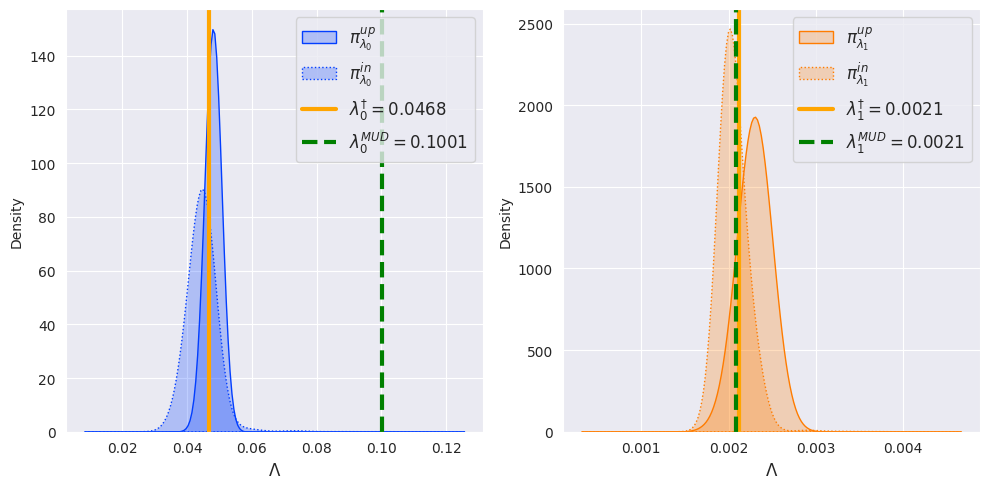

In [91]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 11], lam_true_idx)

## T3

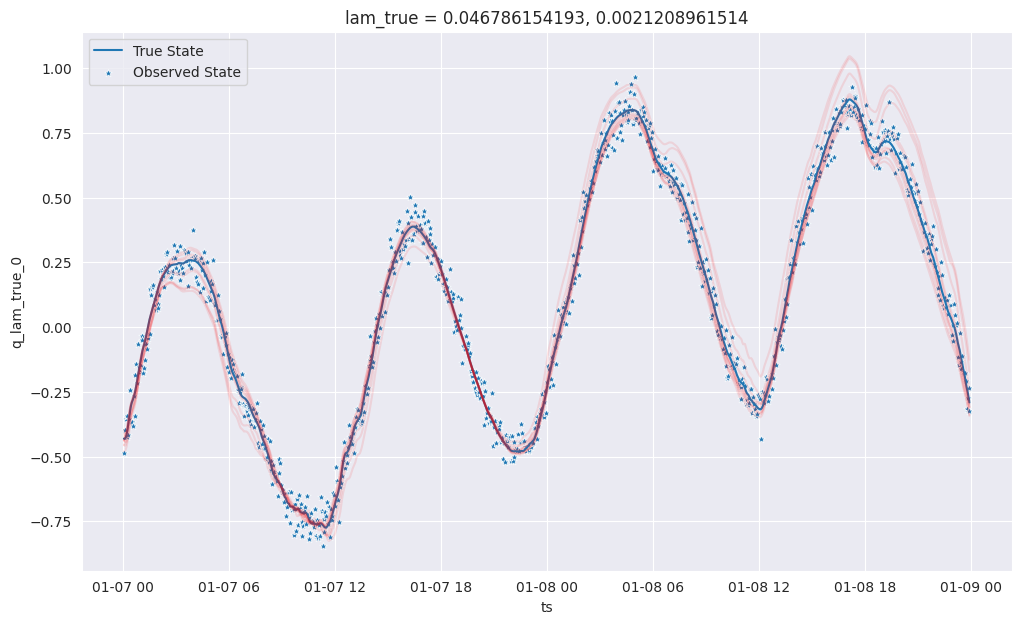

In [54]:
plot_state(data_df, samples_df, t3_mask)

### Solving Using $Q_{PCA}$ Map

In [59]:
from pydci import PCAMUDProblem

pca = PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve(pca_components=[0, 1], pca_mask=t3_mask)
pca.result

[05/01/23 16:18:54] INFO     Computing PCA using 2 components                                  ]8;id=215133;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=431543;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [847.51544017  66.61805424]                         ]8;id=629612;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=246784;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=521205;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=886981;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=853960;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=752946;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask
0,6.691469e-07,4.638833,0.100052,0.002086,"[0, 1]","range(2774, 3732)"


In [60]:
pca.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,q_lam_0,q_lam_1,q_lam_2,q_lam_3,...,q_lam_6127,q_lam_6128,q_lam_6129,q_lam_6130,q_lam_6131,q_lam_6132,lam_0,lam_1,q_pca_0,q_pca_1
0,1.0,4203.892022,0.000547,0.000000e+00,0.000000e+00,0.000000e+00,0.081198,0.081049,0.080766,0.080456,...,0.123873,0.113192,0.101994,0.090447,0.078644,0.066751,0.071064,0.001308,-63.555054,17.984614
1,1.0,6713.032173,0.000302,1.403543e-26,4.643818e-23,3.117410e-19,-0.104616,-0.103161,-0.101568,-0.099139,...,-0.084795,-0.095529,-0.106701,-0.118291,-0.130179,-0.142237,0.048059,0.002301,9.210277,-5.527338
2,1.0,6523.371533,0.000631,1.645818e-87,2.610048e-84,1.702631e-80,-0.028306,-0.027897,-0.027445,-0.026674,...,0.009308,-0.001354,-0.012432,-0.023904,-0.035686,-0.047716,0.050825,0.001849,-18.289744,7.839825
3,1.0,6321.170140,0.000636,6.544751e-116,1.028687e-112,6.502505e-109,-0.021869,-0.021421,-0.020938,-0.020162,...,0.017012,0.006322,-0.004817,-0.016361,-0.028202,-0.040269,0.059981,0.001814,-21.074927,9.089230
4,1.0,3756.974994,0.000231,0.000000e+00,0.000000e+00,0.000000e+00,-0.212427,-0.209993,-0.207002,-0.202497,...,-0.203964,-0.215053,-0.227350,-0.240300,-0.253529,-0.266919,0.065267,0.003045,54.720999,-18.297174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,4419.151273,0.000457,1.255609e-10,2.749656e-07,1.215114e-03,-0.066070,-0.065607,-0.065052,-0.064049,...,-0.032937,-0.043605,-0.054636,-0.065999,-0.077627,-0.089477,0.072864,0.002043,-2.554112,5.949556
96,1.0,3178.844058,0.000311,7.216957e-108,2.318107e-104,7.368901e-101,-0.121407,-0.120860,-0.120123,-0.118786,...,-0.098185,-0.108934,-0.120096,-0.131610,-0.143456,-0.155478,0.076545,0.002347,22.127214,-0.340806
97,1.0,4619.503191,0.000276,5.515880e-76,2.001289e-72,9.244963e-69,-0.036674,-0.035881,-0.034998,-0.033616,...,-0.000195,-0.010872,-0.021963,-0.033443,-0.045227,-0.057251,0.038228,0.001895,-18.154294,3.650142
98,1.0,3645.592399,0.000540,5.600969e-44,1.036462e-40,3.778519e-37,-0.043936,-0.043365,-0.042753,-0.041804,...,-0.008129,-0.018779,-0.029784,-0.041114,-0.052717,-0.064578,0.087306,0.001928,-11.712611,7.636793


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

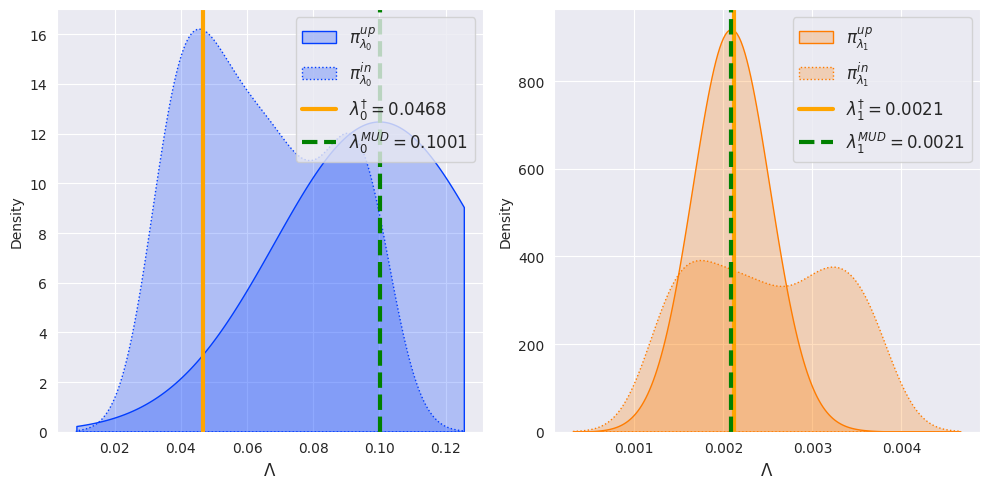

In [61]:
plot_params(pca, pca.state, lam_true_idx)

### Iterative Solve over Components

In [117]:
from pydci.utils import add_noise
from pydci import PCAMUDProblem

pca = PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve_it(pca_components=[[0], [1]], pca_splits=[t3_mask])
pca.it_results

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i
0,0.984699,2.886507,0.046962,0.002321,[0],"range(2774, 3732)",0
0,2.165776,1.621345,0.065697,0.002202,[1],"range(2774, 3732)",1


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

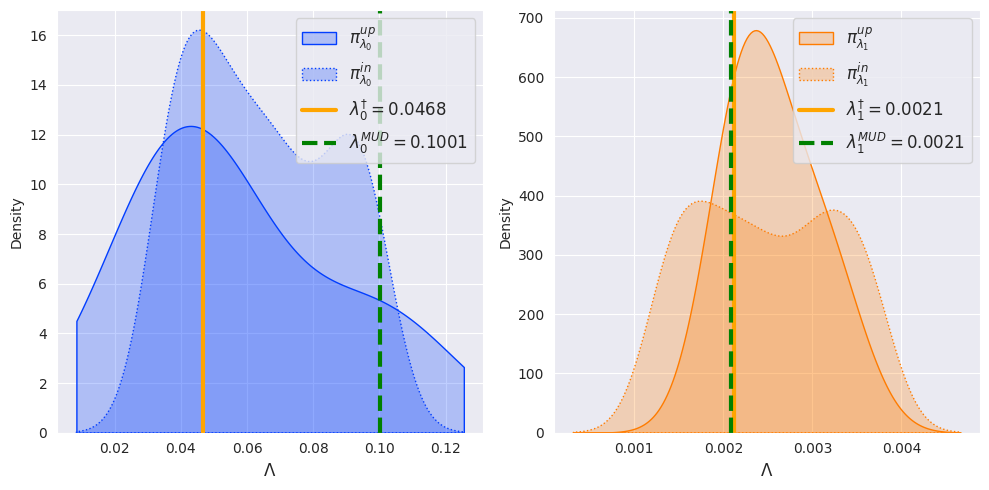

In [63]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 0], lam_true_idx)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

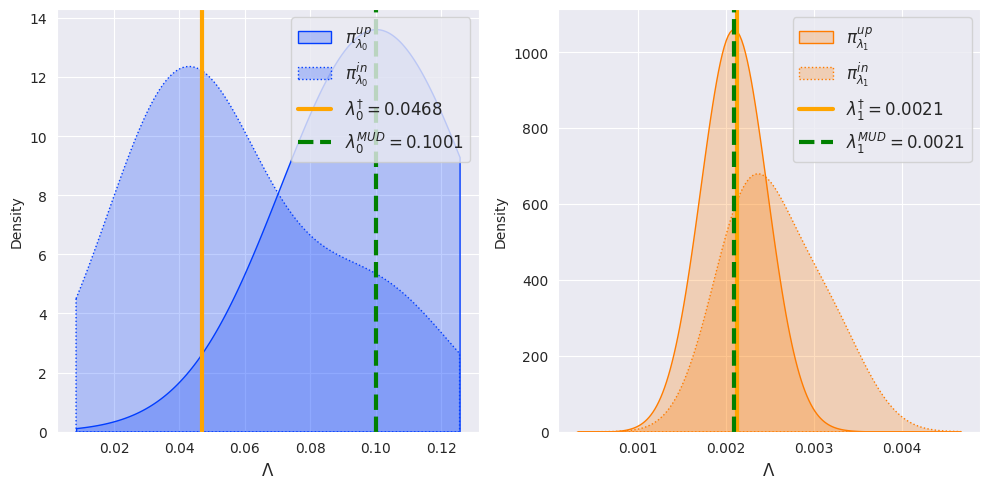

In [64]:
plot_params(pca, pca.state, lam_true_idx)

### Iterative Solve over Data Chunks

In [67]:
pca = PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve_it(pca_splits=split_range(t3_mask, 2), pca_components=[[0, 1]])
pca.it_results

[05/01/23 16:19:21] INFO     Using data for pca: range(2774, 3252)                             ]8;id=874091;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=102123;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#257\257]8;;\

                    INFO     Solving using pca components: [0, 1]                              ]8;id=125329;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=399228;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#259\259]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=818254;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=673252;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [381.11476938  56.63881259]                         ]8;id=607480;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=689610;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=760573;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=532975;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=727042;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=656419;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     |E(r) - 1| = 0.8468081195790578 > 0.5 - Stopping                  ]8;id=540231;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=945770;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#276\276]8;;\

                    INFO     Updating weights                                                  ]8;id=569791;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=296579;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#285\285]8;;\

                    INFO     Using data for pca: range(3252, 3730)                             ]8;id=463223;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=818546;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#257\257]8;;\

                    INFO     Solving using pca components: [0, 1]                              ]8;id=766272;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=755655;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#259\259]8;;\

                    INFO     Computing PCA using 2 components                                  ]8;id=847774;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=237561;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#143\143]8;;\

                    INFO     PCA Variance: [469.73838325  11.74124868]                         ]8;id=72905;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=704962;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#152\152]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=477446;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=347066;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=403506;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=820449;file:///home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i
0,0.153192,3.315668,0.054999,0.002017,"[0, 1]","range(2774, 3252)",0
0,NaN,7.514266,0.100052,0.002086,"[0, 1]","range(3252, 3730)",1


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

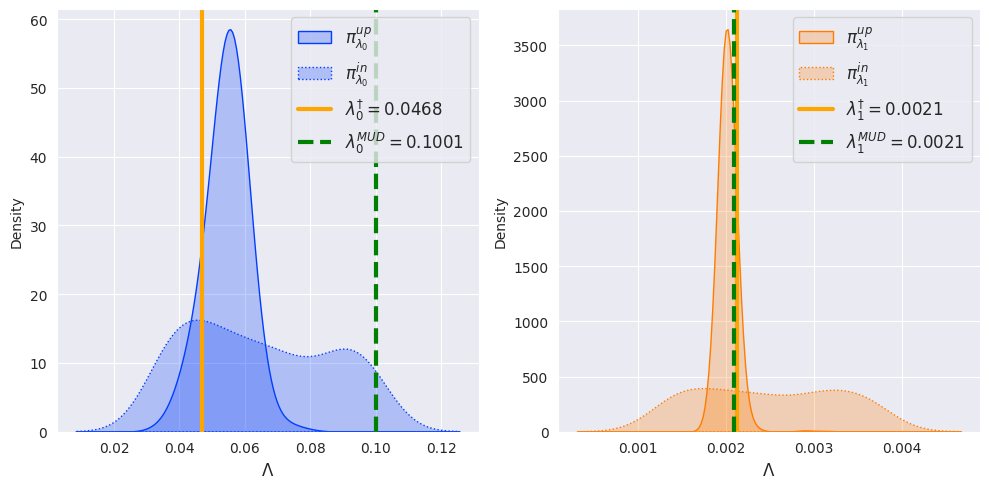

In [68]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 0], lam_true_idx)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

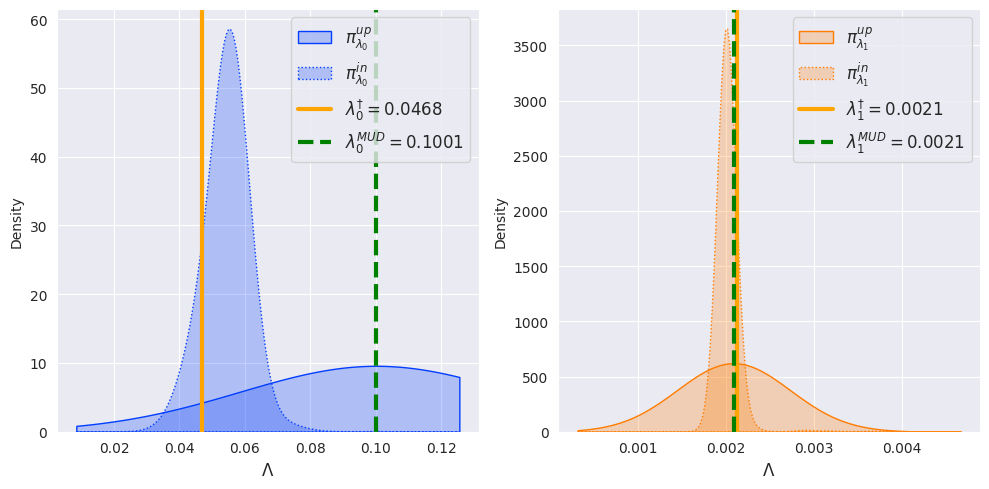

In [69]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 1], lam_true_idx)

#### 10 Splits 

In [138]:
all_lam[lam_true_idx]

array([0.03956333, 0.00235112])

In [149]:
pca = PCAMUDProblem(samples_df, measurements, std_dev)
pca.solve_it(pca_splits=split_range(t3_mask, 5), pca_components=[[0]])
pca.it_results

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i
0,1.284837,1.943037,0.080203,0.002238,[0],"range(2774, 2965)",0
0,0.586015,2.032871,0.040182,0.002519,[0],"range(2965, 3156)",1
0,0.688166,0.989682,0.040182,0.002519,[0],"range(3156, 3347)",2
0,1.218778,0.176346,0.040182,0.002519,[0],"range(3347, 3538)",3
0,NaN,0.446174,0.040182,0.002519,[0],"range(3538, 3729)",4


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

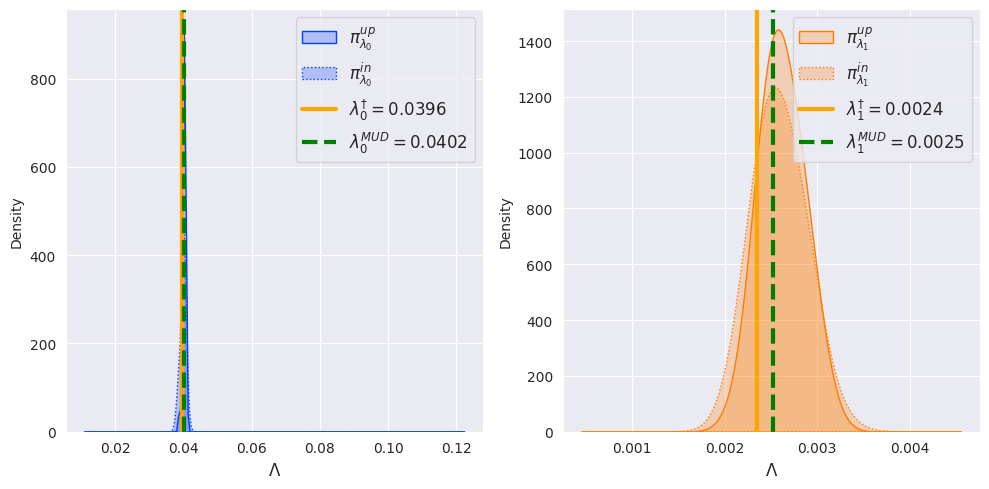

In [150]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 4], lam_true_idx)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

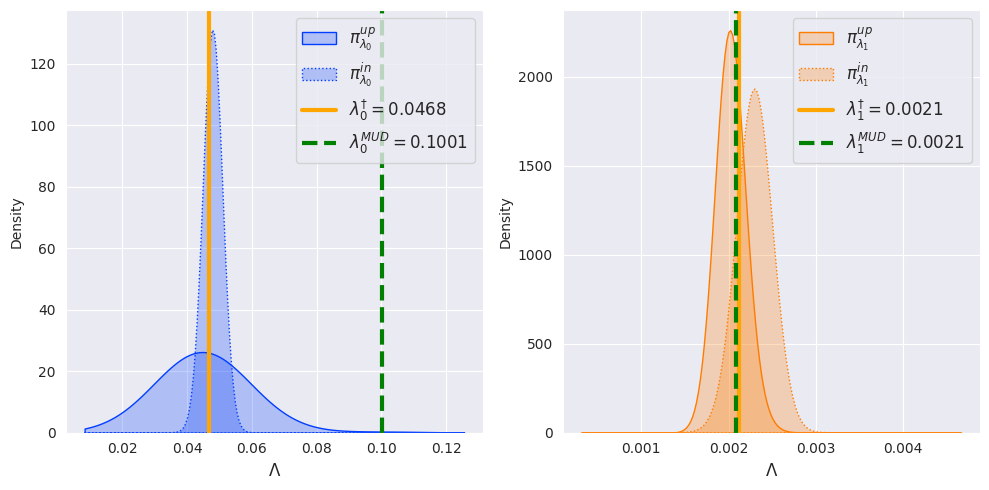

In [78]:
plot_params(pca, pca.pca_states[pca.pca_states["iteration"] == 13], lam_true_idx)

# Using Increasing Number of Data Points

Minimun Number of Data Points?

First time we get near 0.1? 
Lets zoom in.

In [62]:
def increasing_data(pca_list, step_size=5, max_size=150):
    """
    Scan over increasing size of data points.
    """

    search_args = []
    for pc in pca_list:
        search_args += [([range(n)], pc) for n in range(step_size, max_size, step_size)]

    pca = PCAMUDProblem(samples_df, measurements, std_dev)
    res = pca.solve_search(search_args, exp_thresh=0.1)

    pca.search_results["ts"] = [
        full_ds["times"][eval(x)[-1]] for x in pca.search_results["pca_mask"].values
    ]
    pca.search_results["n_ts"] = [
        eval(x)[-1] for x in pca.search_results["pca_mask"].values
    ]

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(pca.search_results, x="n_ts", y="e_r", hue="pca_components", ax=ax)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(pca.search_results, x="n_ts", y="kl", hue="pca_components", ax=ax)

    return pca, ax

In [63]:
step_size = 5
max_size = 150
pca_list = [[[0]], [[0], [1]], [[0, 1]]]

prob, ax = increasing_data(pca_list, 50, 500)

on 0: > /home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py(291)solve_it()
          289 
          290         self.it_results = pd.concat(it_results)
      --> 291         self.result = self.it_results.iloc[[-1]]
          292 
          293         # Re-solve Using Best
      
Solving for different combinations |                                        | ▄▆█ 0/27 [0%] in 2s (~0s, 0.0/s) 

ipdb>  c


on 1: > /home/jovyan/work/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py(291)solve_it()
          289 
          290         self.it_results = pd.concat(it_results)
      --> 291         self.result = self.it_results.iloc[[-1]]
          292 
          293         # Re-solve Using Best
      
Solving for different combinations |█▌                                      | ▇▅▃ 1/27 [4%] in 3s (~54s, 0.5/s) 

ipdb>  q


Solving for different combinations |█▌⚠︎                                     | (!) 1/27 [4%] in 2.9s (0.43/s)            


## Max data up to point

In [52]:
prob.search_results

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,index,predict_delta,within_thresh,closest,max_kl,min_kl,ts,n_ts
0,1.003847,1.884674,0.082435,0.002572,[0],"range(0, 50)",0,0.003847,True,True,False,False,2018-01-01 02:30:00,49
0,0.993907,1.950664,0.085489,0.002593,[0],"range(0, 100)",1,0.006093,True,False,False,False,2018-01-01 05:00:00,99
0,1.059790,2.130589,0.085489,0.002593,[0],"range(0, 150)",2,0.059790,True,False,False,False,2018-01-01 07:30:00,149
0,0.967965,2.329613,0.081713,0.002543,[0],"range(0, 200)",3,0.032035,True,False,False,False,2018-01-01 10:00:00,199
0,0.976940,2.583897,0.081713,0.002543,[0],"range(0, 250)",4,0.023060,True,False,False,False,2018-01-01 12:30:00,249
0,1.009463,2.686351,0.083870,0.002520,[0],"range(0, 300)",5,0.009463,True,False,False,False,2018-01-01 15:00:00,299
0,1.009066,2.711627,0.088686,0.002539,[0],"range(0, 350)",6,0.009066,True,False,False,False,2018-01-01 17:30:00,349
0,0.947177,2.796471,0.088594,0.002541,[0],"range(0, 400)",7,0.052823,True,False,False,False,2018-01-01 20:00:00,399
0,0.967690,2.799119,0.088686,0.002539,[0],"range(0, 450)",8,0.032310,True,False,True,False,2018-01-01 22:30:00,449
0,0.095202,18.114708,0.063742,0.002642,[1],"range(0, 50)",9,0.904798,False,False,False,False,2018-01-01 02:30:00,49


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

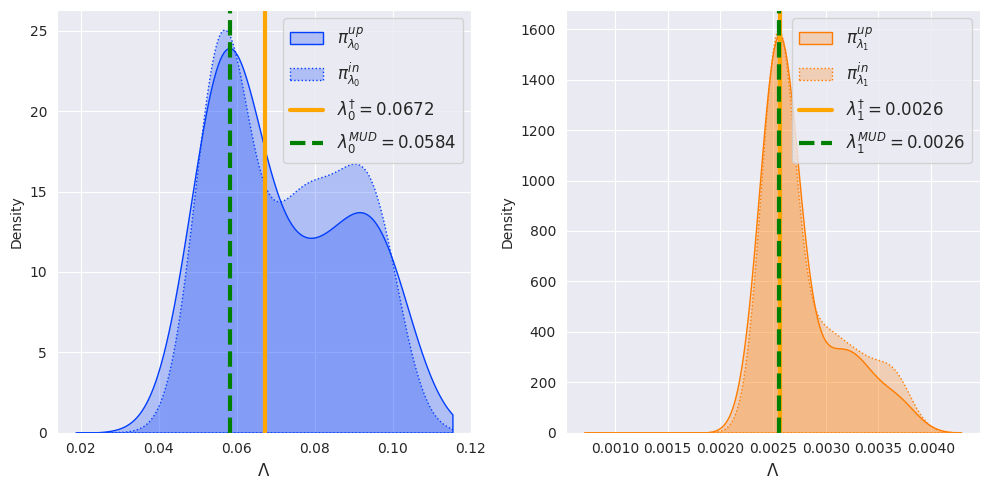

In [53]:
plot_params(prob, prob.state, lam_true_idx)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

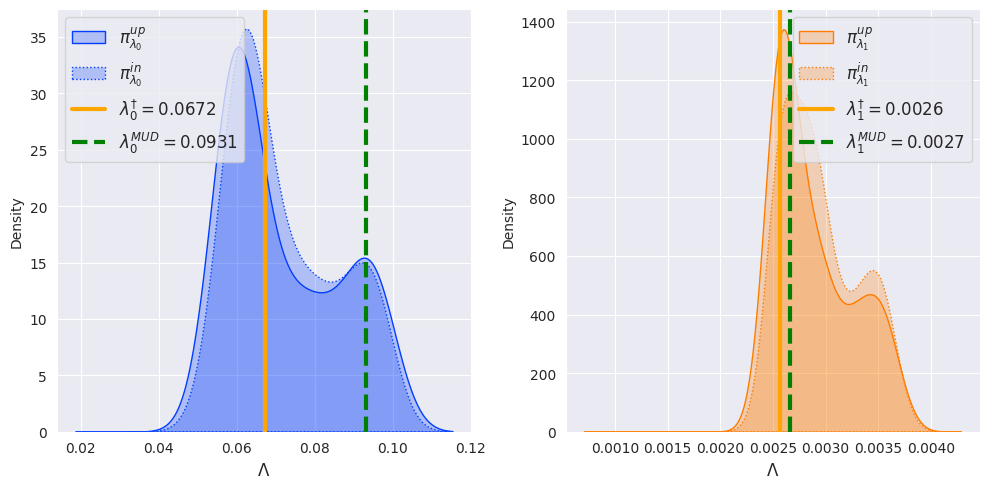

In [45]:
plot_params(
    prob,
    prob.pca_states[
        (prob.pca_states["index"] == 57) & (prob.pca_states["iteration"] == 0)
    ],
    lam_true_idx,
)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

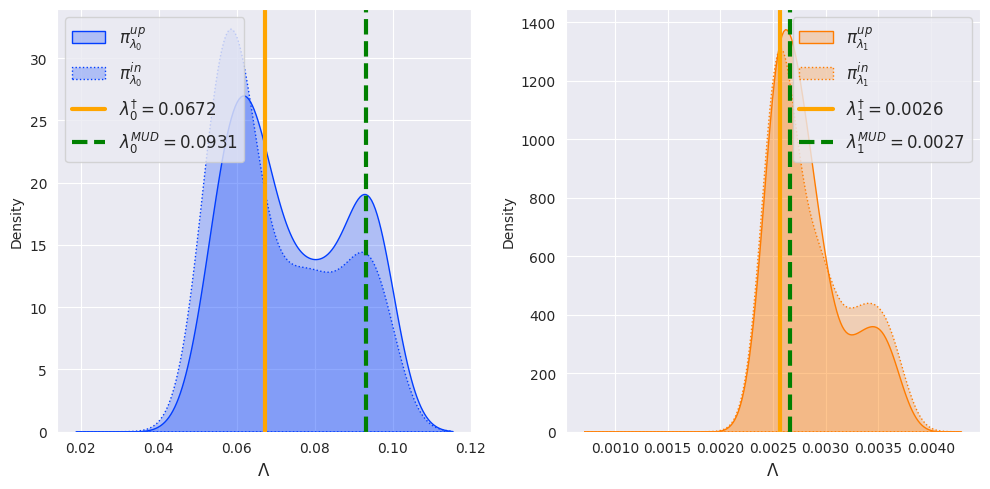

In [46]:
plot_params(
    prob,
    prob.pca_states[
        (prob.pca_states["index"] == 57) & (prob.pca_states["iteration"] == 1)
    ],
    lam_true_idx,
)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\Lambda$', ylabel='Density'>], dtype=object)

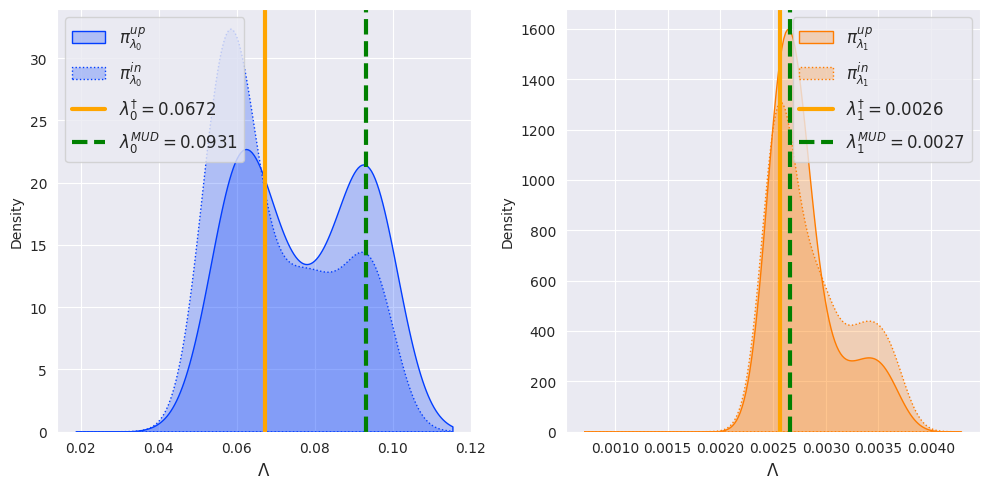

In [47]:
plot_params(
    prob,
    prob.pca_states[
        (prob.pca_states["index"] == 86) & (prob.pca_states["iteration"] == 0)
    ],
    lam_true_idx,
)

In [62]:
pca.search_results[pca.search_results["n_ts"] == 49]

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,index,predict_delta,within_thresh,closest,max_kl,min_kl,ts,n_ts
0,1.034956,2.471163,0.083870,0.002520,[0],"range(0, 50)",9,0.034956,True,False,False,False,2018-01-01 02:30:00,49
0,0.083226,24.366307,0.091763,0.002549,[1],"range(0, 50)",38,0.916774,False,False,False,False,2018-01-01 02:30:00,49
0,0.066596,0.467483,0.096748,0.002522,"[0, 1]","range(0, 50)",67,0.933404,False,False,False,False,2018-01-01 02:30:00,49


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

pca.plot_L(df=pca.state, param_idx=0, lam_true=[full_ds["lam_ref"]], ax=ax[0])
pca.plot_L(df=pca.state, param_idx=1, lam_true=[full_ds["lam_ref"]], ax=ax[1])

## Solving Using $Q_{PCA}$

In [182]:
from pydci import PCAMUDProblem

pca = PCAMUDProblem(samples_df, data_df["q_lam_obs_0"].values, std_dev)
pca.solve(pca_components=[0, 1])
pca.result

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask
0,0.837179,6.831272,0.087369,0.002836,"[0, 1]",None


(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.0028$',
  '$\\lambda^{MUD}_1 = 0.0028$'])

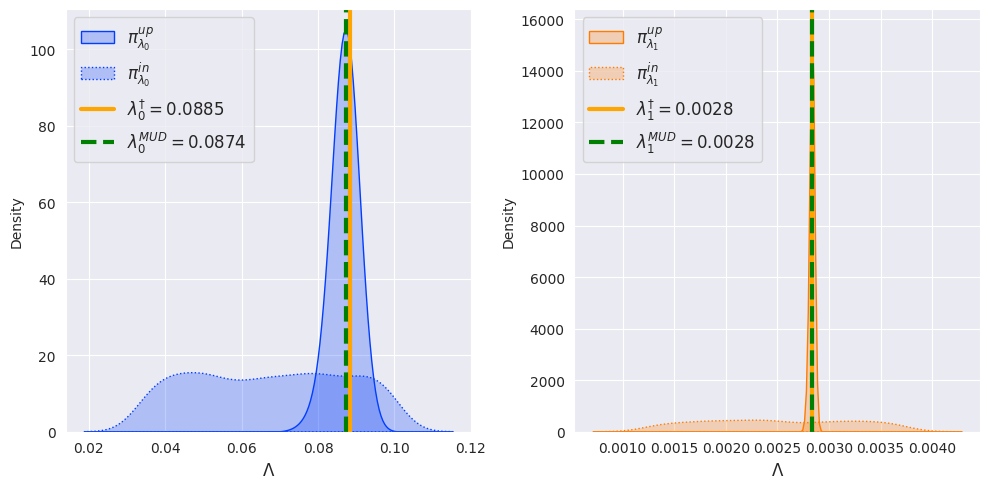

In [183]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

pca.plot_L(df=pca.state, param_idx=0, lam_true=[all_lam[lam_true_idx]], ax=ax[0])
pca.plot_L(df=pca.state, param_idx=1, lam_true=[all_lam[lam_true_idx]], ax=ax[1])

# Experiment 

Returning to the ADCIRC example, lets examine the third time window from /cite{pilosov2023parameter}. 
Lets set-up experiments in this way:
1. Take N = [10, 100, 1000] samples, and repeat each experiment 100 times.
2. For each experiment, pick a sample from the available ones at random. 
3. Estimate over whole time window, and also by splitting up into 2, 4, and 10 intervals.
4. Record results over time. See which get closest to E(r) and see which actually have lowest L_2 error.

### Sub-selecting Time Window

In [9]:
t3 = ["2018-01-07 00:00:00", "2018-01-09 00:00:00"]

In [10]:
t3_mask = data_df.index[(data_df["ts"] > t3[0]) & (data_df["ts"] < t3[1])].values
t3_mask = range(min(t3_mask), max(t3_mask))

In [100]:
def split_range(mask, n_splits=2):
    n_ts = max(mask) - min(mask)
    splits = range(min(mask), max(mask), int(int(n_ts) / n_splits))
    start = min(mask)
    ranges = []
    if n_splits == 1:
        return [range(min(mask), max(mask))]
    for s in splits[1:]:
        ranges.append(range(start, s))
        start = s
    return ranges


split_range(range(len(measurements)), 3)

[range(0, 2044), range(2044, 4088)]

In [154]:
trials = 5
std_dev = 0.05
N = [999]
N = np.repeat(N, 5)
n_splits = [1, 5, 10]

from alive_progress import alive_bar
from pydci.log import disable_log

disable_log()

all_results = []
all_it_results = []
with alive_bar(
    len(N) * len(n_splits), title="Scanning", force_tty=True, receipt=True, length=50
) as bar:
    for num_samples in N:
        sample_idxs = np.random.choice(len(full_ds["lam"]), num_samples, replace=False)
        all_lam = np.vstack(
            [full_ds["lam"][sample_idxs], full_ds["lam_ref"].reshape(1, -1)]
        )
        all_data = np.vstack(
            [full_ds["data"][sample_idxs], full_ds["true_vals"].reshape(1, -1)]
        )
        lam_true_idx = 999  # np.random.choice(all_lam.shape[0], 1)[0]
        measurements = add_noise(all_data[[lam_true_idx]], std_dev, seed=123).reshape(
            -1, 1
        )

        data_df = pd.DataFrame(full_ds["times"], columns=["ts"])
        data_df["shift_idx"] = 0
        data_df["sample_flag"] = True
        for i, val in enumerate(all_lam[lam_true_idx]):
            data_df[f"lam_true_{i}"] = val
        data_df = put_df(data_df, "q_lam_true", all_data[lam_true_idx].reshape(-1, 1))

        data_df = put_df(data_df, "q_lam_obs", measurements)

        sample_idxs = [x for x in range(len(all_lam)) if x != lam_true_idx]

        lam_df = pd.DataFrame(
            all_lam[sample_idxs],
            columns=[f"lam_{i}" for i in range(len(full_ds["lam"][0]))],
        )
        q_lam_df = pd.DataFrame(
            all_data[sample_idxs],
            columns=[f"q_lam_{i}" for i in range(len(full_ds["data"][0]))],
        )
        samples_df = pd.concat([lam_df, q_lam_df], axis=1)

        for ns in n_splits:
            pca = PCAMUDProblem(samples_df, measurements, std_dev)
            pca.solve_it(pca_splits=split_range(t3_mask, ns), pca_components=[[0]])
            l2_err = np.linalg.norm(all_lam[lam_true_idx] - pca.mud_point)
            all_it_results.append(pca.it_results.copy())
            all_it_results[-1]["num_samples"] = num_samples
            all_it_results[-1]["num_splits"] = ns
            all_results.append(pca.result.copy())
            all_results[-1]["num_samples"] = num_samples
            all_results[-1]["num_splits"] = ns
            all_results[-1]["l2_err"] = l2_err
            bar()

all_results = pd.concat(all_results)
all_it_results = pd.concat(all_it_results)

Scanning |██████████████████████████████████████████████████| 15/15 [100%] in 14.0s (1.06/s)                            


In [157]:
test = all_it_results[all_it_results["num_splits"] == 10].copy()
test

,e_r,kl,lam_MUD_0,lam_MUD_1,pca_components,pca_mask,i,num_samples,num_splits
0,1.066672,1.553276,0.049495,0.002668,[0],"range(2774, 2869)",0,999,10
0,1.009767,0.698854,0.095454,0.002636,[0],"range(2869, 2964)",1,999,10
0,0.877778,0.735406,0.094254,0.002605,[0],"range(2964, 3059)",2,999,10
0,1.049191,0.961403,0.062752,0.002680,[0],"range(3059, 3154)",3,999,10
0,0.647720,4.089185,0.063394,0.002738,[0],"range(3154, 3249)",4,999,10
0,0.868795,0.308750,0.082026,0.002509,[0],"range(3249, 3344)",5,999,10
0,0.810098,0.886321,0.071724,0.002557,[0],"range(3344, 3439)",6,999,10
0,0.975168,0.245387,0.071724,0.002557,[0],"range(3439, 3534)",7,999,10
0,1.128767,0.240862,0.071724,0.002557,[0],"range(3534, 3629)",8,999,10
0,NaN,2.369296,0.069212,0.002584,[0],"range(3629, 3724)",9,999,10
